In [ ]:
pip install neurokit2

In [8]:
from google.colab import drive
#import neurokit2 as nk
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import xml.etree.ElementTree as ET
def obtener_onda(item_path):
    # Load XML content
    tree = ET.parse(item_path)
    root = tree.getroot()

    # 1. Parse Patient Info
    patient_info = root.find('PatientInfo')
    patient_data = {child.tag: child.text if child.text is not None else '' for child in patient_info}
    patient_data['Height_Cm'] = patient_info.find('Height/Cm').text
    patient_data['Weight_Kg'] = patient_info.find('Weight/Kg').text
    patient_data['Smoking'] = patient_info.find('Smoke/Smoking').text

    df_patient = pd.DataFrame([patient_data])

    # 2. Parse Study Info (excluding WaveData)
    study_info = root.find('StudyInfo')
    wave_info = study_info.find('WaveInfo')

    study_data = {
        'Study_Id': study_info.findtext('Id', ''),
        'Date': study_info.findtext('Date', ''),
        'Time': study_info.findtext('Time', ''),
        #'AcqDate': record_info.findtext('AcqDate', ''),
        #'AcqTime': record_info.findtext('AcqTime', ''),
        #'Interpretation': interpretation.findtext('statement', ''),
        'Wave_SampleRate_Hz': wave_info.findtext('SampleRate/Hz', ''),
        'Duration/sec': wave_info.findtext('Duration/sec', ''),
    }

    df_study = pd.DataFrame([study_data])

    # 3. Parse WaveData (optional, large data!)
    wave_data = study_info.find('WaveData')
    wave_channel = wave_data.findtext("Channel", '')
    wave_raw = wave_data.findtext('Data', '')
    wave_values = list(map(int, wave_raw.strip().split()))  # May need float()

    # Display or save
    #print("Patient Info:\n", df_patient.head())
    #print(df_patient["Name"].values())
    return {df_patient.loc[0, "Name"]: wave_values}

In [10]:
import pandas as pd
import os

folder_path = "drive/MyDrive/Miscellaneous/Clubes de Ciencia 2025/Programacion/PTB-Diagnostic-Ecg/ECG_RECORDS_XAL2/"
os.listdir(folder_path)
item_name = "06082501_20250806154143.xml" #archivo xml tus datos
item_path = os.path.join(folder_path, item_name)
if os.path.isfile(item_path):
    print(f"File found: {item_name}")
    df = pd.read_xml(item_path)
    una_persona_onda = obtener_onda(item_path)
    #datos_personas.update(una_persona_onda)


File found: 06082501_20250806154143.xml


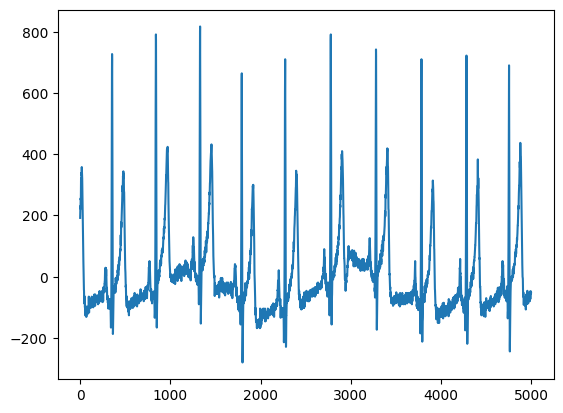

In [13]:
import matplotlib.pyplot as plt
plt.plot(una_persona_onda['william valdez'])

In [ ]:
datos_nosotros_df = pd.DataFrame(datos_personas).T
datos_nosotros_df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
william valdez,192,209,231,231,222,239,256,251,258,295,...,-70,-73,-65,-56,-53,-56,-56,-51,-48,-51
Quetzal Primo,-36,-34,-48,-58,-53,-43,-43,-41,-34,-31,...,90,95,97,95,97,112,124,119,104,112
valeria rdgez,-2,-61,-75,-53,-65,-92,-56,2,-4,-36,...,-39,-24,-83,-83,2,56,56,61,85,124
ivana enriquez,21,-41,-39,-43,-92,-90,26,153,151,36,...,239,329,424,537,664,791,859,781,561,363
Kristel,-36,-29,-48,-68,-56,-41,-31,-17,-9,-34,...,-12,-46,-68,-48,-26,-34,-56,-56,-53,-48
Christa,14,14,65,136,161,151,141,104,41,7,...,-17,19,-17,-68,-41,21,41,39,46,34
Angy,-61,-65,-48,-19,-9,-36,-75,-83,-61,-46,...,68,126,148,104,41,2,-29,-48,-21,4
mariely,-109,-24,-21,-78,-122,-124,-90,-46,-17,-17,...,19,-31,-31,-14,-56,-100,-90,-90,-107,-78
julia,-95,-83,-97,-112,-109,-102,-109,-124,-134,-134,...,-102,-90,-73,-65,-83,-102,-95,-80,-87,-97
Ramses Sanchez,-29,-4,21,24,-4,-17,7,7,-24,-34,...,-43,-56,-75,-65,-31,-4,-12,-41,-58,-53


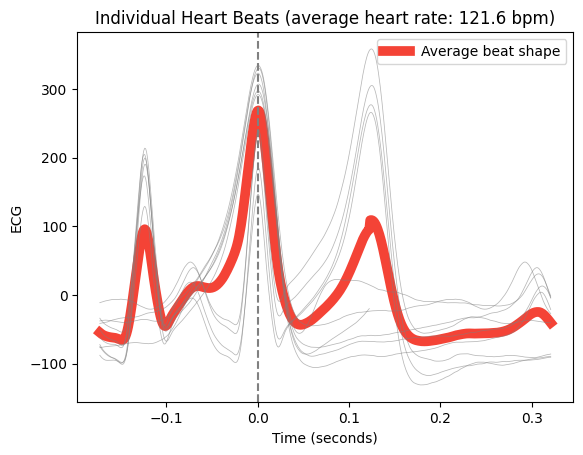

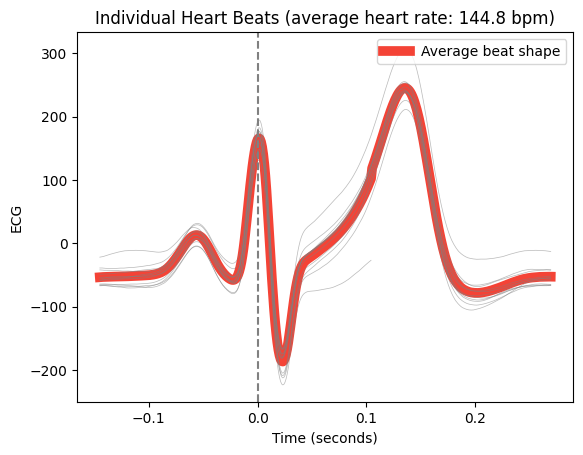

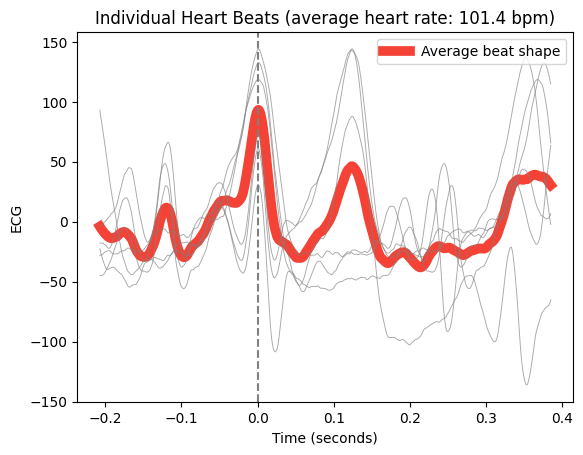

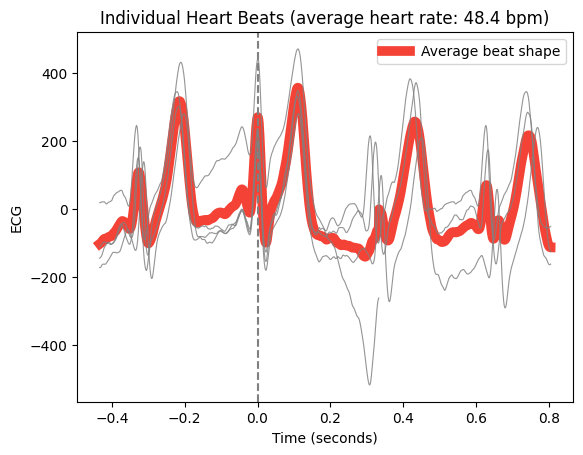

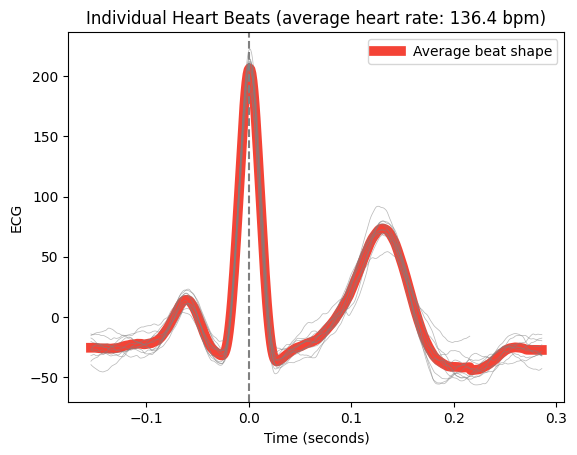

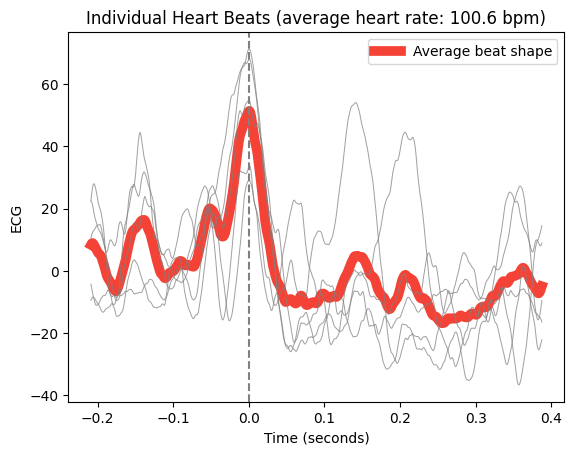

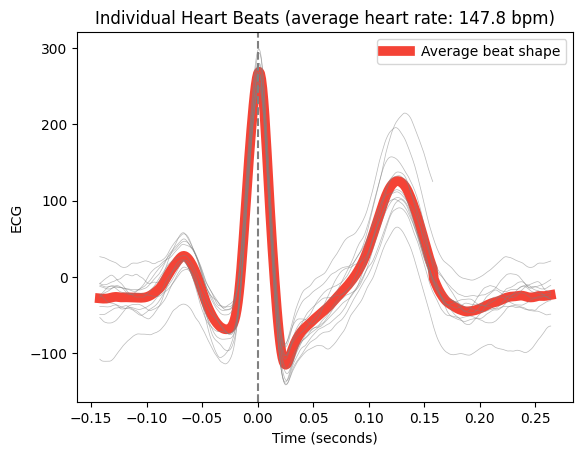

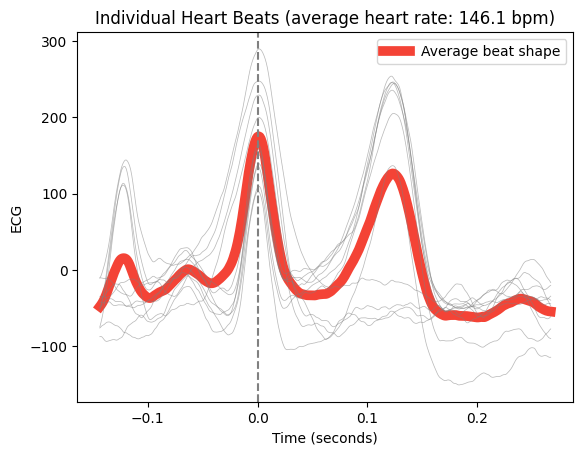

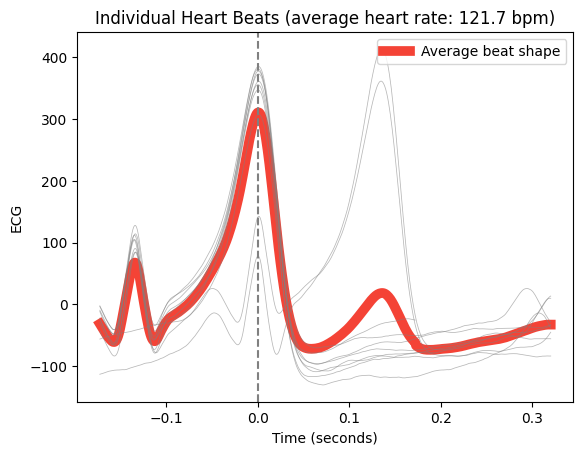

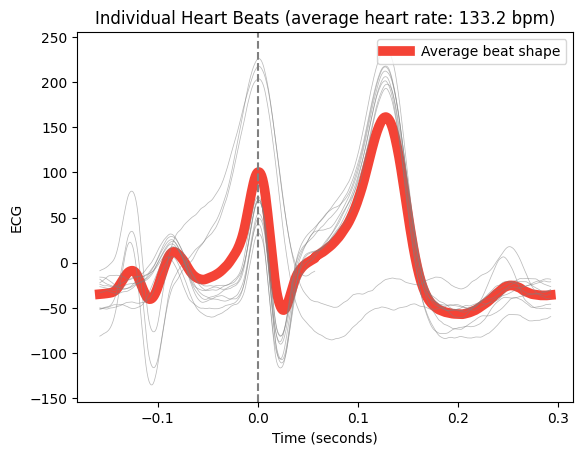

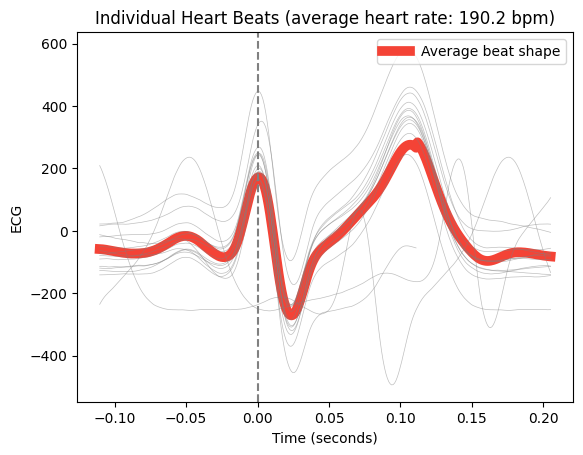

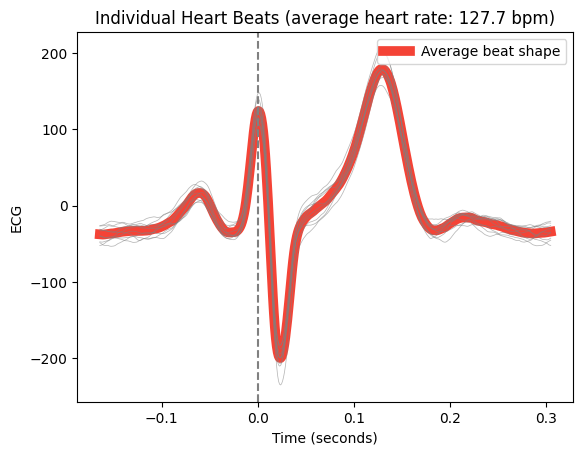

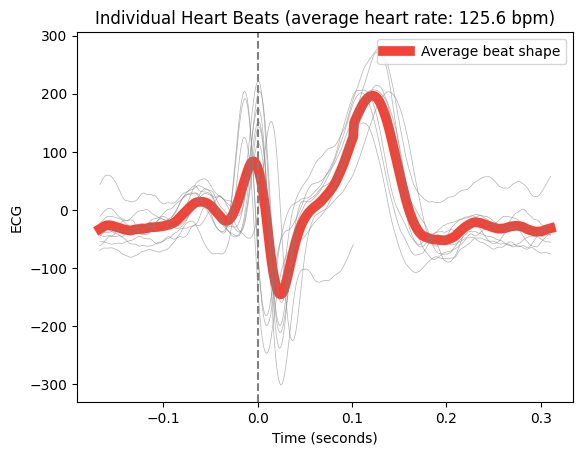

In [ ]:
def medir_promedio_por_paciente(trainX, channel_indice=0):
    num_pacientes = len(trainX)
    for paciente in range(num_pacientes):
        datos =  nk.ecg_clean(trainX.iloc[paciente])
        waves = nk.ecg_segment(datos, show=True)
        datos_lista = list(waves.values())
        datos_df = pd.concat(datos_lista, axis=1)["Signal"]
        datos_promedio = datos_df.median(axis=1).to_frame(f"p{paciente}").reset_index(names=f"tiempo{paciente}")
        if paciente:
            datos_promedio_trainx =pd.merge(datos_promedio_trainx, datos_promedio, left_index=True, right_index=True)
        else:
            datos_promedio_trainx = datos_promedio
    return datos_promedio_trainx[[f"p{i}" for i in range(num_pacientes)]].T

x = medir_promedio_por_paciente(datos_nosotros_df)
x.index = datos_nosotros_df.index

In [ ]:
x.to_csv("nuestros_datos_1_latido.csv", index=False)

In [ ]:
def num_to_range(num, inMin, inMax, outMin, outMax):
  return outMin + (float(num - inMin) / float(inMax - inMin) * (outMax
                  - outMin))
num_to_range(5, 0, 10, 0, 100)

In [3]:
from scipy.interpolate import interp1d
m = interp1d([1,512],[5,10])
m([256, 4, 56])

array([7.49510763, 5.02935421, 5.53816047])

In [4]:
x.min()

NameError: name 'x' is not defined

In [ ]:
plt.plot(wave_values)

,0,1,2,3,4,5,6,7,8,9,...,306,307,308,309,310,311,312,313,314,315
p0,-55.437774,-57.464201,-59.306887,-60.920831,-62.262283,-63.377494,-64.337715,-65.185445,-65.951935,-66.632184,...,7.702803,7.574551,7.456700,7.199250,6.749701,6.260555,5.881810,5.600969,5.315531,5.005497
p1,-57.563242,-57.242742,-56.945265,-56.597837,-56.260512,-55.915791,-55.589925,-55.275416,-54.983516,-54.785270,...,68.426041,58.599968,48.996461,39.460622,30.075664,21.080673,12.513148,4.300589,-3.574504,-11.034630
p2,-20.103821,-21.629724,-22.815537,-22.590555,-22.338031,-22.325468,-22.397863,-22.287719,-22.238785,-22.567312,...,-5.769917,-3.686389,-1.538887,0.362588,2.233037,4.468712,6.992113,9.320741,11.188347,12.801182
p3,-128.729640,-127.305808,-126.024746,-124.871458,-123.703447,-122.343215,-120.495766,-118.019853,-115.165479,-112.331398,...,-64.303940,-63.589727,-63.134727,-63.268941,-63.796119,-64.191259,-64.129362,-63.645426,-62.916952,-62.212689
p4,-26.281518,-26.091441,-24.969401,-24.137362,-23.978982,-24.085344,-24.334189,-24.430519,-24.354332,-24.445630,...,34.825108,30.738275,26.471396,22.992187,19.408251,16.061787,12.662794,8.956274,5.359727,2.410651
p5,10.661896,11.659807,12.365254,12.763239,13.088762,13.496822,13.952419,14.330555,14.561230,13.987940,...,-7.669766,-8.231085,-9.457461,-11.326395,-13.412886,-14.267472,-13.868470,-13.725894,-12.184739,-10.743609
p6,-23.757679,-23.668249,-22.599892,-21.100749,-19.731871,-18.498254,-17.540636,-17.357413,-16.951697,-16.303488,...,-23.584455,-27.071173,-28.940137,-30.596401,-32.370159,-34.201409,-35.935153,-36.555635,-36.173730,-35.579875
p7,-49.542804,-45.650911,-41.653769,-35.720689,-35.420980,-36.048178,-29.847024,-28.264784,-26.512454,-24.640033,...,-45.295520,-46.527529,-46.828613,-48.047026,-50.180206,-51.303114,-50.923570,-50.051279,-49.122750,-49.994465
p8,-22.916797,-26.152980,-29.569020,-33.054917,-36.460671,-39.706282,-42.856749,-45.978322,-48.974751,-51.504711,...,-66.950840,-66.852143,-66.760719,-66.671570,-66.619694,-66.625093,-66.664015,-66.708961,-66.756180,-66.806923
p9,-26.534862,-26.743830,-26.927685,-27.203929,-27.507561,-27.721082,-27.921991,-28.215289,-28.578477,-28.954054,...,78.091235,69.010753,60.051600,51.207527,42.584783,34.265868,26.279534,18.700778,11.703352,5.383506


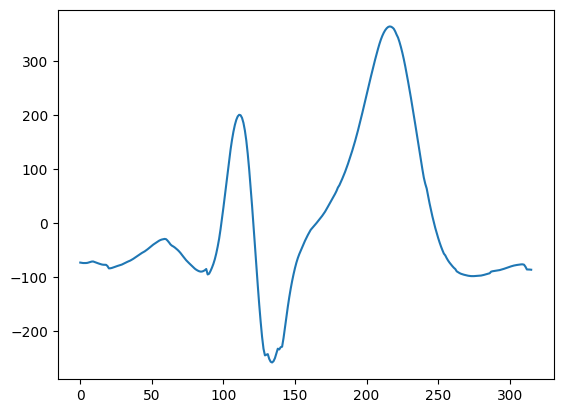

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x.loc["p10", :])